# Learning Bayesian Networks


### Parameter Learning
Given a set of data samples and a DAG that captures the dependencies of between variables of a Fraudulent customer, we can estimate the CPD of the individual variables.

### Structure Learning
Given a set of data samples, we aim to estimate the structure of the DAG (Not covered)



Suppose we have the following data related to customer transactions:

In [1]:
# Import Required Packages
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import pylab as plt

# Transactions data set
trans_data = pd.DataFrame(data={'cur': ["btc","btc", "eth", "btc", "eth", "btc","eth", "btc", 
                                    "eth", "eth", "eth", "btc", "btc", "eth", "btc","eth"], 
                          'amt': ["lge","lge", "lge", "lge", "sml", "lge", "lge", "lge",
                                    "sml", "lge", "lge", "lge", "lge", "sml", "sml","sml"],
                          'cntry': ["za","ng", "za", "ng", "za", "ng", "za", "ng",
                                    "za", "za", "za", "ng", "ng", "za", "ng","za"],
                          'fraud': ["no","yes", "no", "yes", "yes", "yes", "yes", "yes", 
                                    "yes", "yes", "yes", "yes", "no", "no", "no","no"] })
print('---------------Transactions--------------\n')
print(trans_data)

---------------Transactions--------------

    cur  amt cntry fraud
0   btc  lge    za    no
1   btc  lge    ng   yes
2   eth  lge    za    no
3   btc  lge    ng   yes
4   eth  sml    za   yes
5   btc  lge    ng   yes
6   eth  lge    za   yes
7   btc  lge    ng   yes
8   eth  sml    za   yes
9   eth  lge    za   yes
10  eth  lge    za   yes
11  btc  lge    ng   yes
12  btc  lge    ng    no
13  eth  sml    za    no
14  btc  sml    ng    no
15  eth  sml    za    no


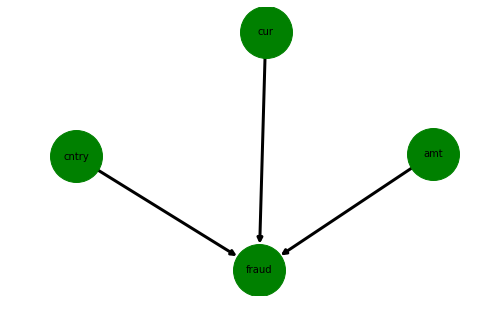

In [2]:
fraud_model = BayesianModel([('cur', 'fraud'), ('amt', 'fraud'), ('cntry','fraud')])  

# Fraud Bayesian Network Plot
nx.draw(fraud_model,width = 3,node_size = 2700, font_size = 10,node_color = 'g', with_labels=True)
plt.show()

In [3]:
print("\n---------------------------")

pe = ParameterEstimator(fraud_model, trans_data)
print("\n", pe.state_counts('cur'))  # unconditional

print("\n---------------------------\n")

print("\n", pe.state_counts('fraud'))  # conditional on amount, currency and amount

print("\n---------------------------\n")


---------------------------

      cur
btc    8
eth    8

---------------------------


 amt    lge                 sml               
cntry   ng        za        ng        za     
cur    btc  eth  btc  eth  btc  eth  btc  eth
fraud                                        
no     1.0  0.0  1.0  1.0  1.0  0.0  0.0  2.0
yes    5.0  0.0  0.0  3.0  0.0  0.0  0.0  2.0

---------------------------



In [5]:
mle = MaximumLikelihoodEstimator(fraud_model, trans_data)
print(mle.estimate_cpd('cur'))  # unconditional based on currency node
print(mle.estimate_cpd('fraud'))  # conditional based on fraud node

+----------+-----+
| cur(btc) | 0.5 |
+----------+-----+
| cur(eth) | 0.5 |
+----------+-----+
+------------+---------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| amt        | amt(lge)            | amt(lge)  | amt(lge)  | amt(lge)  | amt(sml)  | amt(sml)  | amt(sml)  | amt(sml)  |
+------------+---------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| cntry      | cntry(ng)           | cntry(ng) | cntry(za) | cntry(za) | cntry(ng) | cntry(ng) | cntry(za) | cntry(za) |
+------------+---------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| cur        | cur(btc)            | cur(eth)  | cur(btc)  | cur(eth)  | cur(btc)  | cur(eth)  | cur(btc)  | cur(eth)  |
+------------+---------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| fraud(no)  | 0.16666666666666666 | 0.5       | 1.0      

A convenient way to calculate the associated CPD using one function call can also be done:

In [6]:
# Calcualte all CPDs of `fraud_model` using MLE function call:
fraud_model.fit(trans_data, estimator=MaximumLikelihoodEstimator)

In [8]:
est = BayesianEstimator(fraud_model, trans_data)

#Using Bayesian Direchlet uniform prior
print(est.estimate_cpd('fraud', prior_type='BDeu', equivalent_sample_size=100))

+------------+--------------------+-----------+---------------------+--------------------+---------------------+-----------+-----------+-----------+
| amt        | amt(lge)           | amt(lge)  | amt(lge)            | amt(lge)           | amt(sml)            | amt(sml)  | amt(sml)  | amt(sml)  |
+------------+--------------------+-----------+---------------------+--------------------+---------------------+-----------+-----------+-----------+
| cntry      | cntry(ng)          | cntry(ng) | cntry(za)           | cntry(za)          | cntry(ng)           | cntry(ng) | cntry(za) | cntry(za) |
+------------+--------------------+-----------+---------------------+--------------------+---------------------+-----------+-----------+-----------+
| cur        | cur(btc)           | cur(eth)  | cur(btc)            | cur(eth)           | cur(btc)            | cur(eth)  | cur(btc)  | cur(eth)  |
+------------+--------------------+-----------+---------------------+--------------------+----------------